In [1]:
from sandbox.lattice_gas import generate_lattice, update_lattice, index_to_cartesian, bit_directions

In [2]:
import numpy as np
from typing import List
from tqdm import tqdm

def bitfield(n, num_bits) -> List[int]:
    return [int(digit) for digit in f"{n:0{num_bits}b}"]

def bits_to_xy_momenta(value: int) -> np.ndarray:
    bits = np.array(bitfield(value, 6)).reshape(-1,1)
    momenta = bits * bit_directions
    return momenta.sum(axis=0)

def bits_to_spurious(value: int) -> int:
    bits = np.array(bitfield(value, 6)).reshape(-1,1)
    I = bits[1] - bits[4] + bits[2] - bits[5] + bits[3] - bits[0]
    return I

In [3]:
N_rows, N_cols = 100, 100
lattice = generate_lattice((N_rows, N_cols))
# lattice = {site: value if value in [1,2,4,8,16,32] else 0 for site, value in lattice.items()}
lattice_list = [lattice]
N = 100

momenta = []
particle_numbers = []
spurious_c = []

for i in tqdm(range(N)):
    lattice = update_lattice(lattice, N_rows, N_cols)
    lattice_list.append(lattice)
    N_particles = 0
    total_momentum = 0
    spurious = 0
    for site, value in lattice.items():
        N_particles += sum(bitfield(value, 6))
        total_momentum += bits_to_xy_momenta(value)
        spurious += bits_to_spurious(value)
    particle_numbers.append(N_particles)
    momenta.append(total_momentum)
    spurious_c.append(spurious)
lattice_list = lattice_list

momenta = np.array(momenta)

100%|██████████| 100/100 [00:19<00:00,  5.16it/s]


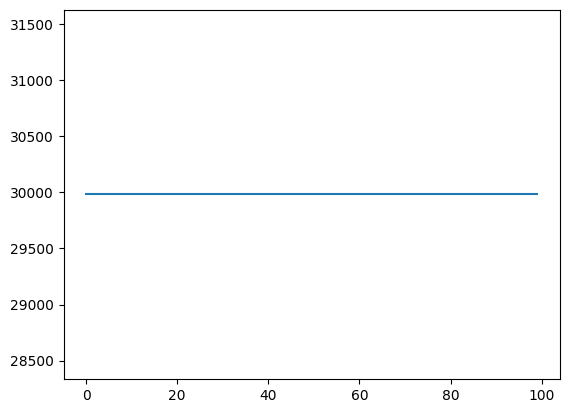

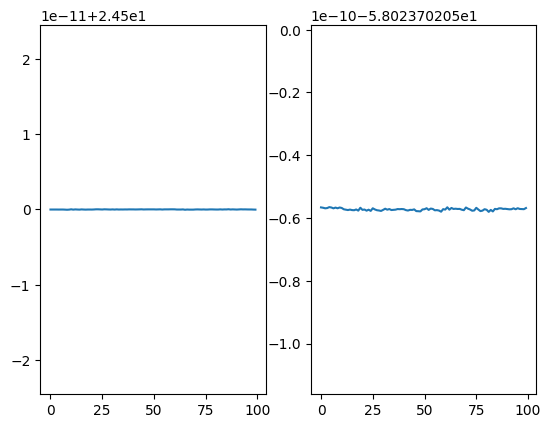

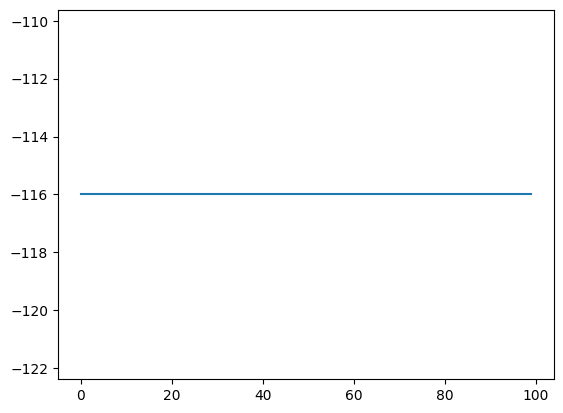

In [4]:
import matplotlib.pyplot as plt

plt.plot(particle_numbers)
plt.show()
plt.subplot(1, 2, 1)
plt.plot(momenta[:,0])
plt.subplot(1, 2, 2)
plt.plot(momenta[:,1])
plt.show()
plt.plot(spurious_c)
plt.show()